In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf 

# Import Neural Net & Data Libraries

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
import keras.utils
import keras.metrics



In [2]:
# Load Data

data = keras.utils.image_dataset_from_directory('data', labels='inferred', label_mode='int')
scaled_data = data.map(lambda x,y: (x/255, y))


Found 7553 files belonging to 2 classes.


In [3]:
# Assign Data

test_len = int(0.1 * len(scaled_data))
train_len = int(0.6 * len(scaled_data))
val_len = int(0.3 * len(scaled_data))

test = scaled_data.take(test_len)
train = scaled_data.skip(test_len).take(train_len)
valid = scaled_data.skip(train_len + test_len).take(val_len)

In [5]:
# Model Creation

model = Sequential([

Conv2D(64, (3,3),1, activation='relu', input_shape=(256,256,3)),
MaxPooling2D(), 
Dropout(0.25),
 
Conv2D(32, (3,3),1, activation='relu'),
MaxPooling2D(),
Dropout(0.25),

Conv2D(64, (3,3),1, activation='relu'),
MaxPooling2D(),
Dropout(0.25),

Flatten(),

Dense(256, activation='relu'),
Dropout(0.3),

Dense(1, activation='sigmoid')







    
])

In [6]:
model.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

In [8]:
log_directory = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

model.fit(train, epochs=17, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/17


142/142 [==============================] - 97s 667ms/step - loss: 0.6405 - accuracy: 0.7313 - val_loss: 0.3370 - val_accuracy: 0.8605
Epoch 2/17
142/142 [==============================] - 101s 706ms/step - loss: 0.2960 - accuracy: 0.8776 - val_loss: 0.3423 - val_accuracy: 0.8750
Epoch 3/17
142/142 [==============================] - 106s 745ms/step - loss: 0.2711 - accuracy: 0.8831 - val_loss: 0.2984 - val_accuracy: 0.8922
Epoch 4/17
142/142 [==============================] - 117s 819ms/step - loss: 0.2550 - accuracy: 0.8941 - val_loss: 0.2389 - val_accuracy: 0.9054
Epoch 5/17
142/142 [==============================] - 98s 687ms/step - loss: 0.2038 - accuracy: 0.9177 - val_loss: 0.2363 - val_accuracy: 0.9010
Epoch 6/17
142/142 [==============================] - 95s 663ms/step - loss: 0.1902 - accuracy: 0.9236 - val_loss: 0.2142 - val_accuracy: 0.9076
Epoch 7/17
142/142 [==============================] - 94s 662ms/step - loss: 0.1708 - accuracy: 0.9287 - val_loss: 0.2036 - v

In [11]:
recall = keras.metrics.Recall()
accuracy = keras.metrics.BinaryAccuracy()
precision = keras.metrics.Precision()

for batch in test.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)

    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)
    precision.update_state(y, yhat)


1/1 [==============================] - 0s 119ms/step


In [12]:
print(f"Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}, Precision:{precision.result().numpy()}")

Recall:0.9786096215248108, Accuracy:0.95652174949646, Precision:0.9384615421295166


In [13]:
import os

In [14]:
first_model = load_model(os.path.join('models','model.h5'))

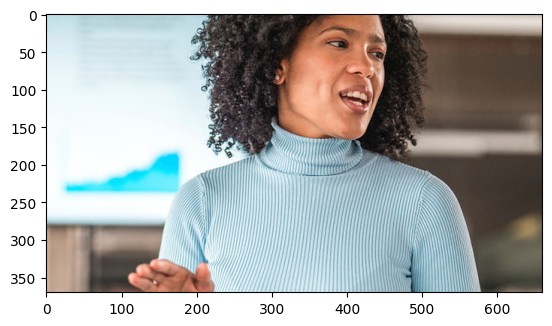

In [53]:
image = cv2.imread(os.path.join('test_images','test4n.jpg'))
resize = tf.image.resize(image, (256,256))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims((resize/255), 0))

1/1 [==============================] - 0s 21ms/step


In [55]:
if yhat >= 0.5:
    print("This person is wearing a mask")
elif yhat < 0.5:
    print("This person is not wearing a mask")

This person is wearing a mask


In [56]:
yhat

array([[0.99022007]], dtype=float32)

In [101]:
model.save(os.path.join('models','model2.h5'))

C:\Users\saiso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
print('commit')

commit
